## Preparación de datos

In [1]:
# Importamos las librerías que necesitamos 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor

In [2]:
# Guardamos nuestro dataset en una varaible

cars = pd.read_csv('/datasets/car_data.csv')

#Imprimimos las primeras filas de nuestro dataset para analizarlo

cars.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [3]:
#Imprimimos las ultimas filas de nuestro dataset para analizarlo

cars.tail()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15
354368,20/03/2016 19:41,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,20/03/2016 00:00,0,40764,24/03/2016 12:45


In [4]:
# Imprimimos informacion general de nuestro dataset

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
# Imprimimos un describe 

cars.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**Conclusiones Iniciales**
- Tenemos un dataset con 354369 filas y 16 columnas
- La información proporcionada será utilizada para crear modelos que predigan los precios de los vehículos. No todas las columnas parecen ser necesarias. Decidiremos cuales utilizar para entrenar nuestro modelo más adelante. 
- Tenemos varias columnas con valores ausentes. 
- Tenemos valores anormales en algunas columnas. En nuestro describe podemos ver que la columna `price` tiene ceros y no es posible que el precio de un vehículo sea de cero. 
- En la columna `registrationyear` vemos que tenemos anos extraños como el año 1000 y el año 9999. De la misma manera tenemos valores extraños en otras columnas y tenemos que decidir qué hacer con estos valores. 
- Las columnas `numberofpictures` no tiene valores. Podemos ver que solo tenemos ceros. Entonces vamos a eliminar esa columna 

In [6]:
# Cambiamos los nombres de las columnas por minusculas

cars.columns = cars.columns.str.lower()
cars.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'mileage', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [7]:
# Cambiamos el tipo de datos de al columna datecrawled 

cars['datecrawled'] = pd.to_datetime(cars['datecrawled'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354369 non-null  datetime64[ns]
 1   price              354369 non-null  int64         
 2   vehicletype        316879 non-null  object        
 3   registrationyear   354369 non-null  int64         
 4   gearbox            334536 non-null  object        
 5   power              354369 non-null  int64         
 6   model              334664 non-null  object        
 7   mileage            354369 non-null  int64         
 8   registrationmonth  354369 non-null  int64         
 9   fueltype           321474 non-null  object        
 10  brand              354369 non-null  object        
 11  notrepaired        283215 non-null  object        
 12  datecreated        354369 non-null  object        
 13  numberofpictures   354369 non-null  int64   

In [8]:
# Eliminamos la columna numberofpictures

cars = cars.drop(columns = 'numberofpictures')

### Outliers

Aquí vamos a trabajar los valores extraños que descubrimos en nuestro primer análisis y vamos a decidir qué hacer con cada uno de estos valores. 

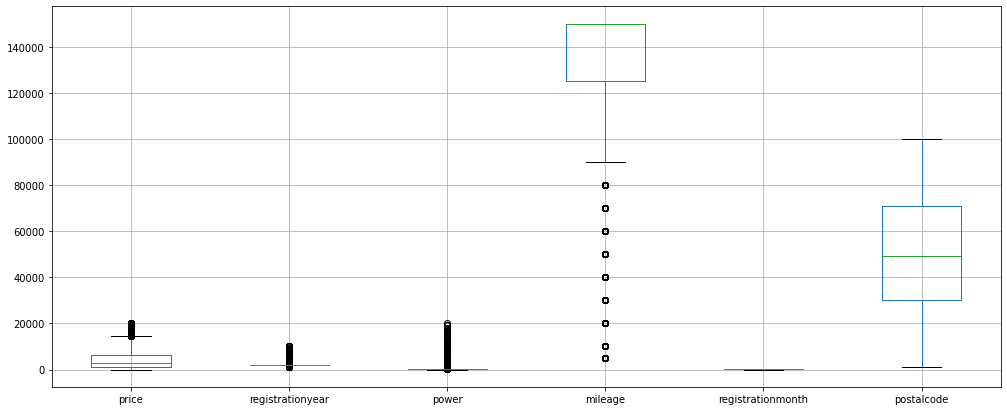

In [9]:
# Creamos una gráfica que nos ayude a analizar nuestros valores atípicos 

cars.boxplot(['price', 'registrationyear', 'power', 'mileage', 'registrationmonth', 'postalcode'],
             figsize=(17,7))
plt.show()

In [10]:
# Definimos una función que nos ayudara a analizar nuestras columnas con valores atípicos con mayor profundidad 

def outliers(df,col,ylabel):
    df.boxplot(col,figsize=(8,5))
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'El IQR de {col} es {IQR}')
    print()

    if low_limit < 0:
        print(f'La cantidad de valores iguales o menores a {min} es {values_0}')
        print()
        print(f'El porcentaje de valores iguales o menores a {min} es {percentage_values_0}')
    else:
        print(f'La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}')
        print()
        print(f'El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}')

    print()
    print(f'EL limite superior es de nuestro boxplot es {up_limit}')
    print()
    print(f'La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}')
    print()
    print(f'Elporcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}')

#### `RegistrationYear`

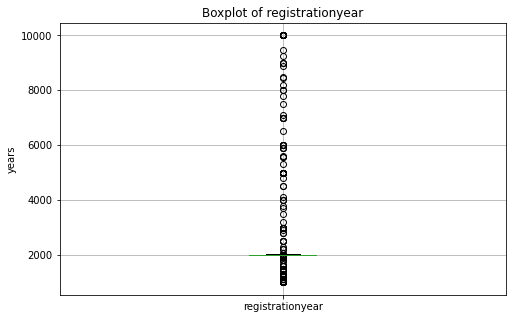

count    354369.000000
mean       2004.234448
std          90.227958
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registrationyear, dtype: float64

El IQR de registrationyear es 9.0

La cantidad de valores iguales o menores a 1990.0 es 12475

El porcentaje de valores iguales o menores a 1990.0 es 3.52%

EL limite superior es de nuestro boxplot es 2017.0

La cantidad de volores iguales o superiores a 2017.0 es 14530

Elporcentaje de valores iguales o superiores a 2017.0 es 4.10%


In [11]:
# Usamos nuestra funcion para analizar los valores de la columna registrationyear

outliers(cars,'registrationyear','years')

**Conclusiones Iniciales `RegistrationYear`**

- Tenemos valores atípicos bajos y altos como podemos ver en nuestra gráfica. 
- Vemos que tenemos números demasiado elevamos como 4000 y hasta casi 10000. 
- También como se había mencionado antes tenemos valores bajos como 1000. 
- Vamos a escoger un rango que nos parezca más coherente y analizaremos la posibilidad de eliminar estos valores o arreglarlos


In [12]:
# Imprimimos un sortvalues con valores únicos para entender un poco mejor lo que tenemos en nuestra columna

cars['registrationyear'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

In [13]:
# Elegimos un rango de años que nos parezca más razonable

len(cars[(cars['registrationyear'] < 1919) | (cars['registrationyear'] > 2019)])

273

In [14]:
# Analizamos el porcentaje de estos valores atípicos 
'{:.2%}'.format(
    len(cars[(cars['registrationyear'] < 1919) | (cars['registrationyear'] > 2019)]) / len(cars))

'0.08%'

In [15]:
# Ya que el porcentaje de estos valores es bastante bajo, vamos a eliminarlos 

cars = cars[(cars['registrationyear'] >= 1919) & (cars['registrationyear'] <= 2019)]

# Confirmamos que estos valores se eliminaron correctamente 

cars['registrationyear'].sort_values().unique()

array([1919, 1920, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

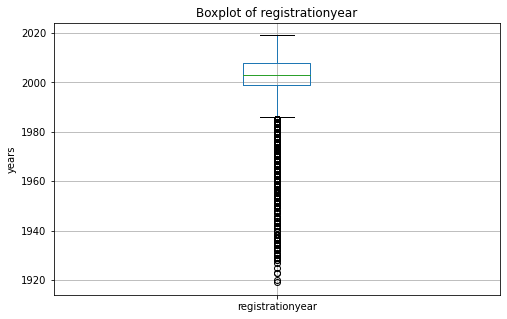

count    354096.000000
mean       2003.111588
std           7.370199
min        1919.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: registrationyear, dtype: float64

El IQR de registrationyear es 9.0

La cantidad de valores iguales o menores a 1990.0 es 12307

El porcentaje de valores iguales o menores a 1990.0 es 3.48%

EL limite superior es de nuestro boxplot es 2017.0

La cantidad de volores iguales o superiores a 2017.0 es 14425

Elporcentaje de valores iguales o superiores a 2017.0 es 4.07%


In [16]:
outliers(cars,'registrationyear','years')

**Conclusiones Finales `RegistrationYear`**
- Podemos ver que nuestro grafico aun registra valores atípicos. Sin embargo, esto se debe que la mayoría de nuestros vehículos se encuentra entre los valores de 1990 y 2017 y tenemos menos valores afuera de este rango. Sin embargo, no significa que estos valores estén mal. Por lo tanto, vamos a dejar los datos tal como han quedado hasta ahora.

#### `Price`

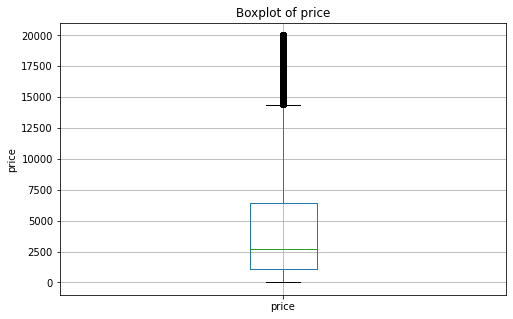

count    354096.000000
mean       4418.832777
std        4514.173803
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

El IQR de price es 5350.0

La cantidad de valores iguales o menores a 0 es 10694

El porcentaje de valores iguales o menores a 0 es 3.02%

EL limite superior es de nuestro boxplot es 11750.0

La cantidad de volores iguales o superiores a 11750.0 es 33590

Elporcentaje de valores iguales o superiores a 11750.0 es 9.49%


In [17]:
# Usamos nuestra función para analizar nuestra columna price

outliers(cars,'price','price')

In [18]:
# Imprimimos valores únicos para entender un poco mejor

cars['price'].sort_values().unique()

array([    0,     1,     2, ..., 19998, 19999, 20000])

**Conclusiones Iniciales `Price`**
- Podemos ver que tenemos valores atípicos muy elevados y también valores atípicos muy bajos. 
- Ya habíamos mencionado que tenemos valores de 0. Tenemos que decidir que vamos a hacer con esto y otros valores tan bajos.
- También vemos que tenemos valores bajos como 1,2, etc. 
- Tenemos también valores elevados de hasta por encima de 20,000 dólares. Sim embargo, sabemos que si hay vehículos que pueden legar a costar tanto. Por lo tanto, no vamos a preocuparnos tanto por estos valores.


In [19]:
# Averiguamos la cantidad de valores atípicos menores a 100 que tenemos 

len(cars[cars['price'] <100])

13190

In [20]:
# Averiguamos el porcentage de valores atípicos menores a 100 que tenemos con respecto a todo el dataset

'{:.2%}'.format(len(cars[cars['price'] <100]) / len(cars))

'3.72%'

In [21]:
# Eliminamos los valores menores a 100

cars = cars[cars['price']>= 100]

# Vamos a asumir que los valores menores a 1000 y mayores a 100 fueron ingresados mal y los vamos a modificar 
# Multiplicaremos cada uno de estos valores por 10

cars['price'] = cars['price'].apply(lambda x: x * 10 if x < 1000 else x)

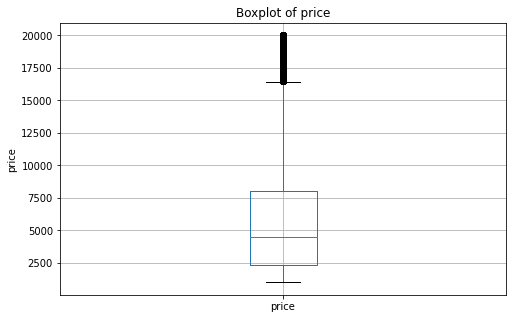

count    340906.000000
mean       5696.517937
std        4194.099599
min        1000.000000
25%        2350.000000
50%        4500.000000
75%        7999.000000
max       20000.000000
Name: price, dtype: float64

El IQR de price es 5649.0

La cantidad de valores iguales o menores a 1000 es 0

El porcentaje de valores iguales o menores a 1000 es 0.00%

EL limite superior es de nuestro boxplot es 13648.0

La cantidad de volores iguales o superiores a 13648.0 es 22484

Elporcentaje de valores iguales o superiores a 13648.0 es 6.60%


In [22]:
# Realizamos un segundo análisis con nuestra función 

outliers(cars,'price','price')

**Conclusiones Finales `Price`**
- Eliminamos todos los valores menores a 100.
- Convertimos los valores menores a 1000 y mayores a 100 multiplicándolos por 10.
- Aun tenemos valores atípicos con valores superiores a los 13,648 dólares, pero estos los vamos a dejar tal como están


#### `Power`

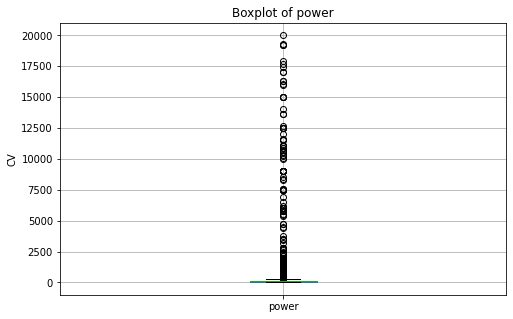

count    340906.000000
mean        111.407183
std         188.312786
min           0.000000
25%          70.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

El IQR de power es 73.0

La cantidad de valores iguales o menores a 0 es 34950

El porcentaje de valores iguales o menores a 0 es 10.25%

EL limite superior es de nuestro boxplot es 216.0

La cantidad de volores iguales o superiores a 216.0 es 18595

Elporcentaje de valores iguales o superiores a 216.0 es 5.45%


In [23]:
outliers(cars,'power','CV')

**Conclusiones `Power`**
- Vemos que al igual que en otras columnas tenemos valores tan bajos como el 0. Sin embargo, estos valores los vamos a tratar como valores ausentes en vez de valores atípicos. Decidiremos que hacer con estos valores más adelante. 
- Vemos que también tenemos valores atípicos muy elevador por encima de 216. Sim embargo no tenemos suficiente información como para poder tomar una decisión con respecto a estos valores elevados. Por el momento los dejaremos como están. Deberíamos hablar con nuestros superiores para poder entender esta variable y poder trabajarla en caso de necesitar más correcciones.


#### `Mileage`

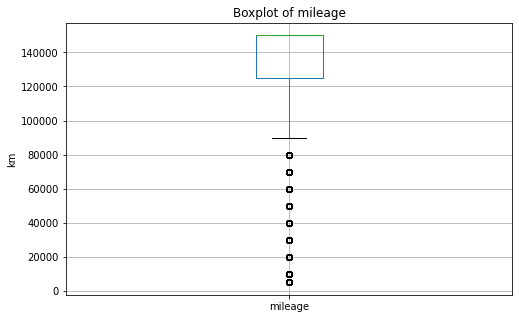

count    340906.000000
mean     128543.792130
std       37174.579414
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: mileage, dtype: float64

El IQR de mileage es 25000.0

La cantidad de valores iguales o menores a 100000.0 es 76298

El porcentaje de valores iguales o menores a 100000.0 es 22.38%

EL limite superior es de nuestro boxplot es 175000.0

La cantidad de volores iguales o superiores a 175000.0 es 0

Elporcentaje de valores iguales o superiores a 175000.0 es 0.00%


In [24]:
# Usamos nuestra función para analizar la columna mileage

outliers(cars,'mileage','km')

**Conclusiones `mileage`**
- Vemos que tenemos valores atípicos con valores menores a 100,000 km y muy pocos con valores superiores a 175,000 km
- Sabemos que estos valores no están mal necesariamente ya que es muy normal que si un carro no es viajo y no tan usado tengo un kilometraje bajo. Por esta razón no vamos a hacer modificaciones a esta columna.


### Duplicates

En esta sección vamos a analizar si tenemos duplicados en nuestro dataset y decidir qué hacer con ellos. Sabemos que no tenemos ninguna columna que nos ayude a identificar cada muestra como única entonces también debemos considerar esto antes de tomar cualquier decisión.

In [25]:
# Imprimimos la cantidad de duplicados 

cars.duplicated().sum()

259

**Conclusiones Duplicados**

El cantidad de duplicados es bastante baja comparada con el dataset. Por esta razon no vamos a hacer nada con los duplicados. 

### Unique values

En esta sección vamos a imprimir los valores únicos de cada columna con valores categóricos para poder analizarlos y saber si es que no se necesita alguna corrección.

In [26]:
categorical_columns = list(set(cars.columns) - set(cars.describe().columns))

for i in categorical_columns:
    unique_values = cars[i].unique()
    print (f'Unique values in column {i}: {unique_values}')
    print('----------'*10)
    print()

Unique values in column model: ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva' 'arosa'
 'other' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8' 'jetta'
 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort' 'forester'
 'xc_reihe' 'scenic' 'a4' 'ka' 'a1' 'insignia' 'combo' 'focus' 'tt'
 'corsa' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensis' 'roomster' 'sl' 'kaef

**Conclusiones**
- Parece todo estar en orden

### Missing Values

En esta sección vamos a analizar los valores ausentes de nuestras columnas y a decidir qué haremos con estos. Recordemos que vamos a tratar como valores ausentes todos los 0 que encontramos en varias de nuestras columnas.

In [27]:
# Creamos una función que nos ayudara a averiguar el porcentaje de valores ausentes por columna con respecto al dataset

def percentage_missing_values(df):
    missing_values = [i for i in df.columns if len(df[df[i].isna()]) > 0 or
                     len(df[df[i]==0]) >0]
    
    for i in missing_values:
        percentage = '{:.2%}'.format(len(df[df[i].isna()]) / len(df))
        print(f'Percetage of null values in {i}: {percentage}')

In [28]:
# Remplazamos todos los ceros con np.nan

cars = cars.replace(0,np.nan)

# Usamos nuestra función para analizar el porcentaje de valores ausentes

percentage_missing_values(cars)

Percetage of null values in vehicletype: 9.53%
Percetage of null values in gearbox: 4.75%
Percetage of null values in power: 10.25%
Percetage of null values in model: 4.98%
Percetage of null values in registrationmonth: 9.24%
Percetage of null values in fueltype: 8.29%
Percetage of null values in notrepaired: 18.84%


Podemos ver que tenemos muchas columnas con valores ausentes y al eliminar todas estas columnas perderíamos una gran parte de nuestro dataset. Por esta razón vamos a analizar con mayor profundidad cada una de estas columnas y a decidir qué hacer con estos valores. 

Tal vez decidamos eliminar los valores ausentes de una de las columnas con porcentajes menores a 5%. 


In [29]:
# Definimos una función que nos ayudara a reemplazar valores ausentes en nuestras columnas  

def replace(row,column_1,column_2,new_df, column_3 = None):
    missing = row[column_1]
    new_value = row[column_2]

    if column_3 != None:
        addtional = row[column_3]
        if pd.isna(missing):
            try:
                return new_df[column_1][addtional][new_value]
            except:
                return None
        else:
            return missing

    else:
        if pd.isna(missing):
            try:
                return new_df[column_1][new_value]
            except:
                return None
        else:
            return missing

#### `Power`

In [30]:
# Imprimimos las primeras columnas de nuestro dataset con valores ausentes en la columna power 

cars[cars['power'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
0,2016-03-24 11:52:00,4800,NaN,1993,manual,NaN,golf,150000,NaN,petrol,volkswagen,NaN,24/03/2016 00:00,70435,07/04/2016 03:16
32,2016-03-15 20:59:00,2450,sedan,1994,NaN,NaN,golf,150000,2.0,petrol,volkswagen,no,15/03/2016 00:00,44145,17/03/2016 18:17
37,2016-03-28 17:50:00,1500,NaN,2016,NaN,NaN,kangoo,150000,1.0,gasoline,renault,no,28/03/2016 00:00,46483,30/03/2016 09:18
54,2016-03-17 07:56:00,4700,wagon,2005,manual,NaN,signum,150000,NaN,NaN,opel,no,17/03/2016 00:00,88433,04/04/2016 04:17
55,2016-03-26 10:39:00,5500,wagon,1999,manual,NaN,astra,150000,8.0,gasoline,opel,yes,26/03/2016 00:00,56759,01/04/2016 23:17


**Conclusiones Iniciales `Power`**

- No Parece haber ningún patrón de valores ausentes. Tendremos que pensar en alguna manera de reemplazar estos valores. 
- El poder CV de un vehículo puede estar relacionado con su tipo de auto (marca y modelo). Por esto vamos a remplazar los valores ausentes usando esta relación. 


In [31]:
# Definimos una función para obtener un solo valor de moda   

def custom_mode(series):
    mode_result = series.mode()
    return mode_result.iloc[0] if not mode_result.empty else np.nan


# Creamos una tabla con la relación que mencionamos antes para poder hacer el remplazo de valores ausentes

power_replace = cars.pivot_table(index=['brand','model'],values='power',aggfunc=custom_mode)
power_replace.head(10)

power
brand      model        
alfa_romeo 145     103.0
           147     105.0
           156     155.0
           159     150.0
           other   150.0
           spider  150.0
audi       100     133.0
           200     165.0
           80       90.0
           90      136.0

In [32]:
# Hacemos el remplazo usando la función que creamos previamente 

cars['power'] = cars.apply(replace, args = ('power','model',power_replace,'brand'),axis=1)

# Comprobamos que ya no tengamos valores ausentes 

cars['power'].isna().any()

True

Al parecer aún tenemos valores ausentes en esta columna. Veamos qué más podemos hacer. 

In [33]:
# Analizamos el porcentaje de valores ausente que nos quedan 

'{:.2%}'.format(len(cars[cars['power'].isna()])/len(cars))

'1.35%'

In [34]:
# Ya que el porcentaje es bastante menor, vamos a eliminar estos valores. 

cars = cars.dropna(subset=['power'])

# Comprobamos ya no tener más valores ausentes en esta columna

cars['power'].isna().any()

False

#### `RegistrationMonth`

In [35]:
# Imprimimos las primeras filas

cars[cars['registrationmonth'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
0,2016-03-24 11:52:00,4800,NaN,1993,manual,75.0,golf,150000,NaN,petrol,volkswagen,NaN,24/03/2016 00:00,70435,07/04/2016 03:16
9,2016-03-17 10:53:00,9990,small,1998,manual,101.0,golf,150000,NaN,NaN,volkswagen,NaN,17/03/2016 00:00,27472,31/03/2016 17:17
16,2016-01-04 12:46:00,3000,NaN,2016,NaN,60.0,polo,150000,NaN,petrol,volkswagen,NaN,01/04/2016 00:00,38871,01/04/2016 12:46
36,2016-11-03 11:50:00,1600,other,1991,manual,75.0,kadett,70000,NaN,NaN,opel,NaN,11/03/2016 00:00,2943,07/04/2016 03:46
54,2016-03-17 07:56:00,4700,wagon,2005,manual,155.0,signum,150000,NaN,NaN,opel,no,17/03/2016 00:00,88433,04/04/2016 04:17


In [36]:
# Imprimimos los valores únicos

cars['registrationmonth'].sort_values().value_counts()

3.0     33476
6.0     30512
4.0     28366
5.0     28185
7.0     26352
10.0    25379
11.0    23547
12.0    23483
9.0     23175
1.0     22241
8.0     21904
2.0     20603
Name: registrationmonth, dtype: int64

**Conclusiones `RegistrationYear`**

- Es difícil ver algún patrón y entender por qué hacen falta estos valores
- Vemos que cada mes se repite casi el mismo número de veces que el resto de meses.
- Para solucionar esto solo asignaremos de manera aleatoria los meses en las filas con valores faltantes


In [37]:
# Creamos un vector de valores aleatorias de entre 1 y 12 

random_values = np.random.randint(1,13,size=len(cars))

# Remplazamos los valores en nuestra columna

cars['registrationmonth'] = cars['registrationmonth'].fillna(pd.Series(random_values,index=cars.index))

# Comprobamos que no haya más valores ausentes

cars['registrationmonth'].isna().any()

False

#### `Model`

Ya que este es uno de las con columnas con porcentajes menores a 5%, vamos a eliminar los valores nulos de esta columna. 

In [38]:
# Eliminamos los valores ausentes

cars = cars.dropna(subset=['model'])

# comprobamos

cars['model'].isna().any()

False

#### `VehicleType`

In [39]:
cars[cars['vehicletype'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
0,2016-03-24 11:52:00,4800,NaN,1993,manual,75.0,golf,150000,10.0,petrol,volkswagen,NaN,24/03/2016 00:00,70435,07/04/2016 03:16
16,2016-01-04 12:46:00,3000,NaN,2016,NaN,60.0,polo,150000,6.0,petrol,volkswagen,NaN,01/04/2016 00:00,38871,01/04/2016 12:46
22,2016-03-23 14:52:00,2900,NaN,2018,manual,90.0,meriva,150000,5.0,petrol,opel,no,23/03/2016 00:00,49716,31/03/2016 01:16
26,2016-10-03 19:38:00,5555,NaN,2017,manual,125.0,c4,125000,4.0,NaN,citroen,no,10/03/2016 00:00,31139,16/03/2016 09:16
31,2016-03-29 16:57:00,8990,NaN,2016,manual,60.0,clio,150000,6.0,petrol,renault,NaN,29/03/2016 00:00,37075,29/03/2016 17:43


In [40]:
cars[cars['vehicletype'].isna()]['brand'].unique()

array(['volkswagen', 'opel', 'citroen', 'renault', 'fiat', 'hyundai',
       'seat', 'bmw', 'ford', 'honda', 'audi', 'kia', 'skoda', 'nissan',
       'mercedes_benz', 'peugeot', 'mini', 'daewoo', 'mazda', 'lancia',
       'toyota', 'smart', 'volvo', 'chevrolet', 'land_rover', 'chrysler',
       'rover', 'lada', 'trabant', 'suzuki', 'dacia', 'mitsubishi',
       'saab', 'subaru', 'alfa_romeo', 'jaguar', 'jeep', 'porsche',
       'daihatsu'], dtype=object)

**Conclusiones `VehicleType`**

- Una ves mas vemos que no tenemos pista del porque estos valores estan faltando. Lo mas probable es que se hayan olvidado de llenar este campo. 
- Vamos a a llenar estos valores ausentes creando una nueva tabla con una relacion del tipo de vehiculo y su marca. 

In [41]:
# Creamos la nueva tabla

vechile_replace = cars.pivot_table(index='brand',values='vehicletype',aggfunc=pd.Series.mode)
vechile_replace.head(10)

,vehicletype
brand,
alfa_romeo,sedan
audi,wagon
bmw,sedan
chevrolet,small
chrysler,bus
citroen,small
dacia,wagon
daewoo,small
daihatsu,small


In [42]:
# Remplazamos

cars['vehicletype'] = cars.apply(replace, args = ('vehicletype','brand',vechile_replace),axis=1)

# Comprobamos que ya no tengamos mas valores nulos 

cars['vehicletype'].isna().any()

False

#### `GearBox`

In [43]:
cars[cars['gearbox'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
16,2016-01-04 12:46:00,3000,sedan,2016,NaN,60.0,polo,150000,6.0,petrol,volkswagen,NaN,01/04/2016 00:00,38871,01/04/2016 12:46
32,2016-03-15 20:59:00,2450,sedan,1994,NaN,75.0,golf,150000,2.0,petrol,volkswagen,no,15/03/2016 00:00,44145,17/03/2016 18:17
37,2016-03-28 17:50:00,1500,small,2016,NaN,75.0,kangoo,150000,1.0,gasoline,renault,no,28/03/2016 00:00,46483,30/03/2016 09:18
69,2016-01-04 11:56:00,1200,coupe,2001,NaN,75.0,astra,150000,7.0,NaN,opel,NaN,01/04/2016 00:00,47249,07/04/2016 08:46
92,2016-03-16 07:56:00,2500,small,2000,NaN,60.0,ka,150000,7.0,NaN,ford,NaN,16/03/2016 00:00,51427,21/03/2016 09:47


**Conclusiones `gearbox`**

- No podemos determinar a razón de los valores faltantes
- Algo que podría determinar el si un auto es manual o automático es su modelo y marca de vehículo. Por esta razón vamos a remplazar nuestros valores creando una tabla con esta relación. 


In [44]:
# Creamos nuestra tabla

gearbox_replace = cars.pivot_table(index=['brand','model'],values='gearbox',aggfunc=custom_mode)
gearbox_replace

gearbox
brand      model           
alfa_romeo 145       manual
           147       manual
           156       manual
           159       manual
           other     manual
...                     ...
volvo      v40       manual
           v50       manual
           v60       manual
           v70       manual
           xc_reihe    auto

[296 rows x 1 columns]

In [45]:
# Vemos la cantidad de autos manuales y automáticos   

gearbox_replace['gearbox'].value_counts()

manual    254
auto       42
Name: gearbox, dtype: int64

In [46]:
# Remplazamos

cars['gearbox'] = cars.apply(replace, args = ('gearbox','model',gearbox_replace,'brand'),axis=1)

# Comprobamos 

cars['gearbox'].isna().any()

False

#### `FuelType`

In [47]:
cars[cars['fueltype'].isna()].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,postalcode,lastseen
9,2016-03-17 10:53:00,9990,small,1998,manual,101.0,golf,150000,12.0,NaN,volkswagen,NaN,17/03/2016 00:00,27472,31/03/2016 17:17
13,2016-03-21 21:37:00,2500,wagon,2004,manual,131.0,passat,150000,2.0,NaN,volkswagen,no,21/03/2016 00:00,90762,23/03/2016 02:50
26,2016-10-03 19:38:00,5555,small,2017,manual,125.0,c4,125000,4.0,NaN,citroen,no,10/03/2016 00:00,31139,16/03/2016 09:16
36,2016-11-03 11:50:00,1600,other,1991,manual,75.0,kadett,70000,9.0,NaN,opel,NaN,11/03/2016 00:00,2943,07/04/2016 03:46
41,2016-03-30 20:38:00,7500,sedan,2002,auto,306.0,e_klasse,150000,4.0,NaN,mercedes_benz,NaN,30/03/2016 00:00,33649,03/04/2016 11:44


**Conclusiones `FuelType`**

En esta ocasión remplazaremos nuestros valores ausentes con la relación de tipo de vehículo y su modelo. 

In [48]:
# Creamos nuestra tabla 

fueltype_replace = cars.dropna(subset=['fueltype']).pivot_table(
    index=['vehicletype','model'],values='fueltype',aggfunc=pd.Series.mode)
fueltype_replace['fueltype'] = fueltype_replace['fueltype'].apply(
    lambda x: x[0] if isinstance(x, np.ndarray) else x)
fueltype_replace.head(10)

fueltype
vehicletype model            
bus         1_reihe  gasoline
            2_reihe  gasoline
            300c       petrol
            3_reihe  gasoline
            3er      gasoline
            4_reihe  gasoline
            500        petrol
            5_reihe  gasoline
            5er      gasoline
            6_reihe    petrol

In [49]:
# Vemos la cantidad de cada tipo de combustible 

fueltype_replace['fueltype'].value_counts()

petrol      780
gasoline    337
lpg          15
other         1
hybrid        1
cng           1
Name: fueltype, dtype: int64

In [50]:
# Hacemos el remplazo

cars['fueltype'] = cars.apply(replace,args =('fueltype','model',fueltype_replace,'vehicletype'),axis=1)

# Comprobamos que no hayan mas valores ausentes 

cars['fueltype'].isna().any()

True

In [51]:
len(cars[cars['fueltype'].isna()])

24

In [52]:
# Eliminamos la cantidad de valores ausentes que quedaron

cars = cars.dropna(subset=['fueltype'])

# Comprobamos 

cars['fueltype'].isna().any()

False

#### `NotRepaired`

Mayormente algo que puede determinar si un vehículo ha sido reparado o no es que tan viejo es o su recorrido. Vamos a analizar la relación de kilometraje y reparación.

In [53]:
# Creamos una tabla con la relacion de kilometraje

notrepaired_replace = cars.pivot_table(index='mileage',values='notrepaired',aggfunc=custom_mode)
notrepaired_replace

,notrepaired
mileage,
5000,no
10000,no
20000,no
30000,no
40000,no
50000,no
60000,no
70000,no
80000,no


In [54]:
# Creamos una nueeva tabla repecto al ano de registro

notrepaired_replace = cars.pivot_table(index='registrationyear',values='notrepaired',aggfunc=custom_mode)
notrepaired_replace

,notrepaired
registrationyear,
1923,no
1929,yes
1930,no
1931,yes
1932,no
...,...
2015,no
2016,no
2017,no


In [55]:
# Imrpimo la cantidad de reparados y no reparados

cars['notrepaired'].value_counts()

no     235383
yes     31447
Name: notrepaired, dtype: int64

**Conclusiones `NotRepaired`**

- Vemos que la mayoría de los carros no han sido reparados sin importar que tan viejos sean. Esta relación no está funcionando.
- Vamos a remplazar todos nuestros valores nulos con "No" ya que la mayoría no han sido reparados


In [56]:
# Hacemos el remplazo

cars['notrepaired'] = cars['notrepaired'].fillna('no')

# Comprobamos

cars['notrepaired'].isna().any()

False

In [57]:
# Analizamos el porcetage de datos que tenemos con respecto al dataset original 

'{:.2%}'.format(len(cars) / 354369 )

'91.41%'

In [58]:
# Comprobamos ya no tener mas nulos en ninguna columna 

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323914 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        323914 non-null  datetime64[ns]
 1   price              323914 non-null  int64         
 2   vehicletype        323914 non-null  object        
 3   registrationyear   323914 non-null  int64         
 4   gearbox            323914 non-null  object        
 5   power              323914 non-null  float64       
 6   model              323914 non-null  object        
 7   mileage            323914 non-null  int64         
 8   registrationmonth  323914 non-null  float64       
 9   fueltype           323914 non-null  object        
 10  brand              323914 non-null  object        
 11  notrepaired        323914 non-null  object        
 12  datecreated        323914 non-null  object        
 13  postalcode         323914 non-null  int64   

**Conclusiones**

Hemos eliminado o llenado cada valor nulo en cada columna. Ahora ya podemos continuar al siguiente paso de creación de modelos. 

## Entrenamiento del modelo 

Antes de entrenar algún modelo necesitamos preparar nuestros datos. Para esto vamos a:

- Escoger las columnas que utilizaremos como nuestros features. 
- Eliminaremos las columnas que no necesitamos 
- Codificaremos nuestras columnas con valores categóricos usando el método OHE.
- Dividiremos nuestro dataset en datos de entrenamiento y de validación 
- Crearemos una función para calcular el RMSE 

In [59]:
# Creamos una copia de nuestro dataset

cars_c = cars.copy()

# Creamos una lista con los nombres de las columnas que no necesitamos

columns_not_needed = ['datecrawled','registrationmonth','datecreated','postalcode','lastseen']

# Creamos una lista con las columnas categorías que si necesitamos

columns_needed = list(set(categorical_columns)-set(columns_not_needed))

# Eliminamos las columnas que no necesitamos

cars_c = cars_c.drop(columns_not_needed,axis=1)

# Usamos el método OHE para transformar nuestras columnas categóricas a numéricas  

cars_ohe = pd.get_dummies(cars_c,columns=columns_needed,drop_first = True)

# Analizamos el tamaño de nuestro nuevo dataset

cars_ohe.shape

(323914, 305)

In [60]:
# Separamos nuestros datos en features y target

features = cars_ohe.drop('price',axis=1)
target = cars_ohe['price']

# Dividimos nuestro dataset en conjunto de validación y conjunto de entrenamiento

features_train,features_valid,target_train,target_valid = train_test_split(
    features,target,test_size = 0.25)

In [61]:
# Creamos una función para calcular el RMSE 

def RMSE (y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Linear Regression

In [62]:
model = LinearRegression()
print('Training Time')
%time model.fit(features_train, target_train)
print()
print('Prediction Time')
%time predictions = model.predict(features_valid)
print()
print('RMSE')
print(RMSE(target_valid,predictions))

Training Time
CPU times: user 15.8 s, sys: 2.29 s, total: 18.1 s
Wall time: 18.1 s

Prediction Time
CPU times: user 58 ms, sys: 105 ms, total: 163 ms
Wall time: 191 ms

RMSE
3328.8192150961704


**Conclusiones**

- Con este primer modelo tenemos un tiempo CPU time de 18.1 segundos en el entrenamiento
- Tenemos un tiempo de 163 ms en el tiempo de predicción
- Tenemos un RMSE de 3328.81


### SDG Linear Regression 

En este modelo intentaremos usar el descenso de gradiente estocástica a ver si logramos mejorar nuestra predicción o tiempo de predicción.  

In [63]:
# Creamos nuestra clase de regresión linear con descenso de gradiente estocástico 

class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
    
    def fit(self, train_features, train_target):
        X = np.concatenate(
            (np.ones((train_features.shape[0], 1)), train_features), axis=1
        )
        y = train_target
        w = np.zeros(X.shape[1])
        
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = (
                    2
                    * X_batch.T.dot(X_batch.dot(w) - y_batch)
                    / X_batch.shape[0]
                )
                
                w -= self.step_size * gradient

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [64]:
model = SGDLinearRegression(0.1,10,128)
print('Training Time')
%time model.fit(features_train, target_train)
print()
print('Prediction Time')
%time predictions = model.predict(features_valid)
print()
print('RMSE')
print(RMSE(target_valid,predictions.index))

Training Time
CPU times: user 15.3 s, sys: 26.8 s, total: 42.2 s
Wall time: 42.2 s

Prediction Time
CPU times: user 52.8 ms, sys: 138 ms, total: 191 ms
Wall time: 197 ms

RMSE
199857.63620663324


**Conclusiones**

- Tenemos un tiempo mayor de entrenamiento con 42.2 segundos 
- Tenemos un tiempo mayor de predicción con 191 ms.
- Nuestra predicción no fue mejor que en nuestro modelo anterior. Tenemos un RMSE de 199857.63


### Random Forest Regression

In [66]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state = 12345), param_grid=param_grid, 
    cv=2, scoring='neg_mean_squared_error')

print('Grid Search Training Time')
%time grid_search.fit(features_train,target_train)

r_f_best_params = grid_search.best_params_
r_f_best_model = RandomForestRegressor(**r_f_best_params)

print()
print('Best Model Training Time')
%time r_f_best_model.fit(features_train,target_train)
print()
print('Prediction Time')
%time predict_forest = r_f_best_model.predict(features_valid)
print()
print('RMSE')
print(RMSE(target_valid,predict_forest))

Grid Search Training Time
CPU times: user 56min 47s, sys: 7.25 s, total: 56min 54s
Wall time: 57min 12s

Best Model Training Time
CPU times: user 8min 53s, sys: 736 ms, total: 8min 54s
Wall time: 8min 56s

Prediction Time
CPU times: user 3.14 s, sys: 56.1 ms, total: 3.2 s
Wall time: 3.2 s

RMSE
2614.5230139223163


**Conclusiones**

- Podemos ver que el tiempo de entrenamiento del GridSearch es de casi una hora. Esto se debe a que este algoritmo está buscando los mejores parámetros de la grilla que nosotros le hemos proporcionado. 
- Vemos que el entrenamiento del modelo con los mejores hiperparametros obtenidos por el GridSearch baja de manera significativa. Tenemos un tiempo de entrenamiento de 8 minutos con 54 segundos. A pesar de ser mucho menor que el entrenamiento GridSearch, este tiempo es mucho mayor que el algoritmo de regresión.
- A pesar de demorar mucho más tiempo, este algoritmo ha tenido el mejor RMSE con un 2614.52


### Cat Boost Regressor

Como el Cat Boost Rgressor pude usar nuestras columnas con datos categóricos sin ningún problema, vamos a usar nuestro dataset con las columnas categóricas antes de ser procesadas con el método OHE. Crearemos nuevos features y target y conjunto de validación y entrenamiento.

In [65]:
# Creamos nuestros nuevos features y target

features = cars_c.drop('price',axis=1)
target = cars_c['price']

# Dividimos en conjunto de entrenamiento y validación 

features_train,features_valid,target_train,target_valid = train_test_split(
    features,target,test_size = 0.25)

In [66]:
param_grid = {
    'iterations': [100,200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
}

grid_search = GridSearchCV(estimator=CatBoostRegressor(), param_grid = param_grid,
                           scoring='neg_mean_squared_error', cv=3)
print('Grid Search Training Time')
%time grid_search.fit(features_train, target_train, cat_features=columns_needed)
print()

c_b_best_params = grid_search.best_params_

best_catboost_reg = CatBoostRegressor(**c_b_best_params)

print('Best Model Training Time')
%time best_catboost_reg.fit(features_train, target_train, cat_features=columns_needed)
print()

print('Prediction Time')
%time predict_catboost = best_catboost_reg.predict(features_valid)
print()
print('RMSE')
print(RMSE(target_valid,predict_catboost))

Grid Search Training Time
0:	learn: 4190.7572861	total: 144ms	remaining: 14.2s
1:	learn: 4173.2436057	total: 216ms	remaining: 10.6s
2:	learn: 4155.2476282	total: 289ms	remaining: 9.36s
3:	learn: 4137.5710653	total: 372ms	remaining: 8.93s
4:	learn: 4120.5490937	total: 450ms	remaining: 8.55s
5:	learn: 4103.0834828	total: 531ms	remaining: 8.32s
6:	learn: 4086.0486369	total: 601ms	remaining: 7.99s
7:	learn: 4069.8638869	total: 677ms	remaining: 7.79s
8:	learn: 4053.2628809	total: 752ms	remaining: 7.6s
9:	learn: 4036.7773831	total: 829ms	remaining: 7.46s
10:	learn: 4021.1020908	total: 903ms	remaining: 7.31s
11:	learn: 4005.1544606	total: 984ms	remaining: 7.21s
12:	learn: 3989.6963585	total: 1.06s	remaining: 7.1s
13:	learn: 3974.0837991	total: 1.14s	remaining: 7.03s
14:	learn: 3958.6205809	total: 1.22s	remaining: 6.91s
15:	learn: 3943.9806692	total: 1.3s	remaining: 6.81s
16:	learn: 3929.1247938	total: 1.38s	remaining: 6.72s
17:	learn: 3915.0740201	total: 1.45s	remaining: 6.6s
18:	learn: 3900.

**Conclusiones**

- Tambien hemos utilizado el GridSearch en esta ocacion para obtener los mejores parametros. Al igual que enn nuestro modelo de bosque aleatorio, el entrenamiento del gridsearch ha tomado demasiado tiempo.
- Al igual que en nuestro modelo de bosque aleatorio, una vez encontrados los mejores parametros, el tiempo de entrenamiento del mejor modelo disminuye significativamente. 
- Tenemos un RMSE de 2296.38

## Análisis del modelo

Hemos entrenado tres modelos diferentes y hemos visto mejoras en nuestra función de perdida en cada uno de nuestros modelos. Sin embargo, los tiempos que cada uno de estos modelos ha variado bastante. 

Tenemos nuestro modelo de regresión linear con el RMSE más alto de los tres modelos, pero también con el tiempo más bajo de los tres. 

Tenemos al modelo de bosque aleatorio con una predicción mejor que el de regresión linear. Sin embargo, el tiempo que toma al modelo dar las predicciones es demasiado alto. 

Tenemos a nuestro último modelo de CatBoost. Este modelo tuvo el mejor valor RMSE. Sin embargo, su tiempo de entrenamiento es alto, aunque menor que el de bosque aleatorio.



# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos